## ML Experiment 5b: Gaussian Mixture Model using Expectation Maximisation Algorithm
**Aim : Implement GMM with EM Algorithm to categorize data**

### Defining our own GMM class

Reference: http://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/

In [1]:
import numpy as np
from scipy.stats import multivariate_normal 

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter) 

    def initialize(self, X):
        # returns the (r,c) value of the numpy array of X
        self.shape = X.shape 
        # n has the number of rows while m has the number of columns of dataset X
        self.n, self.m = self.shape 
        

        # initial weights given to each cluster are stored in phi or P(Ci=j)
        self.phi = np.full(shape=self.k, fill_value=1/self.k) 

        # initial weights given to each data point wrt to each cluster or P(Xi/Ci=j)
        self.weights = np.full(shape=self.shape, fill_value=1/self.k)
        
        # dataset is divided randomly into k parts of unequal sizes
        random_row = np.random.randint(low=0, high=self.n, size=self.k)

        # initial value of mean of k Gaussians
        self.mu = [  X[row_index,:] for row_index in random_row ] 

        # initial value of covariance matrix of k Gaussians
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ] 
        # theta =(mu1,sigma1,mu2,simga2......muk,sigmak)

    # E-Step: update weights and phi holding mu and sigma constant
    def e_step(self, X):
        # updated weights or P(Xi/Ci=j)
        self.weights = self.predict_proba(X)
        # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster k or (phi)k
        self.phi = self.weights.mean(axis=0)

    # M-Step: update meu and sigma holding phi and weights constant
    def m_step(self, X):
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()

            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,aweights=(weight/total_weight).flatten(), bias=True)

    # responsible for clustering the data points correctly
    def fit(self, X):
        # initialise parameters like weights, phi, meu, sigma of all Gaussians in dataset X
        self.initialize(X)
        plt.figure(figsize=(16, 25))
        for iteration in range(self.max_iter):
            permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])
            permuted_prediction = permutation[gmm.predict(X)]
            print('\nThe accuracy of the permuted prediction against target before iteration ',iteration+1,end="")
            print(': ',np.mean(iris.target == permuted_prediction))
            print('\n')
            confusion_matrix(iris.target, permuted_prediction)
            plt.title(' Iteration Cluster')
            plt.subplot(5,3,iteration+1)
            clusters=permuted_prediction
            plt.xlabel(iris.feature_names[0])
            plt.ylabel(iris.feature_names[1])
            plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
            plt.grid()
            plt.tight_layout()
            # iterate to update the value of P(Xi/Ci=j) and (phi)k
            self.e_step(X)
            # iterate to update the value of meu and sigma as the clusters shift
            self.m_step(X)
            

    # predicts probability of each data point wrt each cluster
    def predict_proba(self, X):
        # Creates a n*k matrix denoting probability of each point wrt each cluster 
        likelihood = np.zeros( (self.n, self.k) ) 
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i],cov=self.sigma[i])
            # pdf : probability denisty function
            likelihood[:,i] = distribution.pdf(X) 

        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    # predict function 
    def predict(self, X):
        weights = self.predict_proba(X)
        # datapoint belongs to cluster with maximum probability
        # returns this value
        return np.argmax(weights, axis=1)


### Testing our Model on Iris dataset

In [2]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data


In [3]:
# convert numpy array to DataFrame
import pandas as pd
Y = pd.DataFrame(X, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
Y.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visualising Iris Dataset

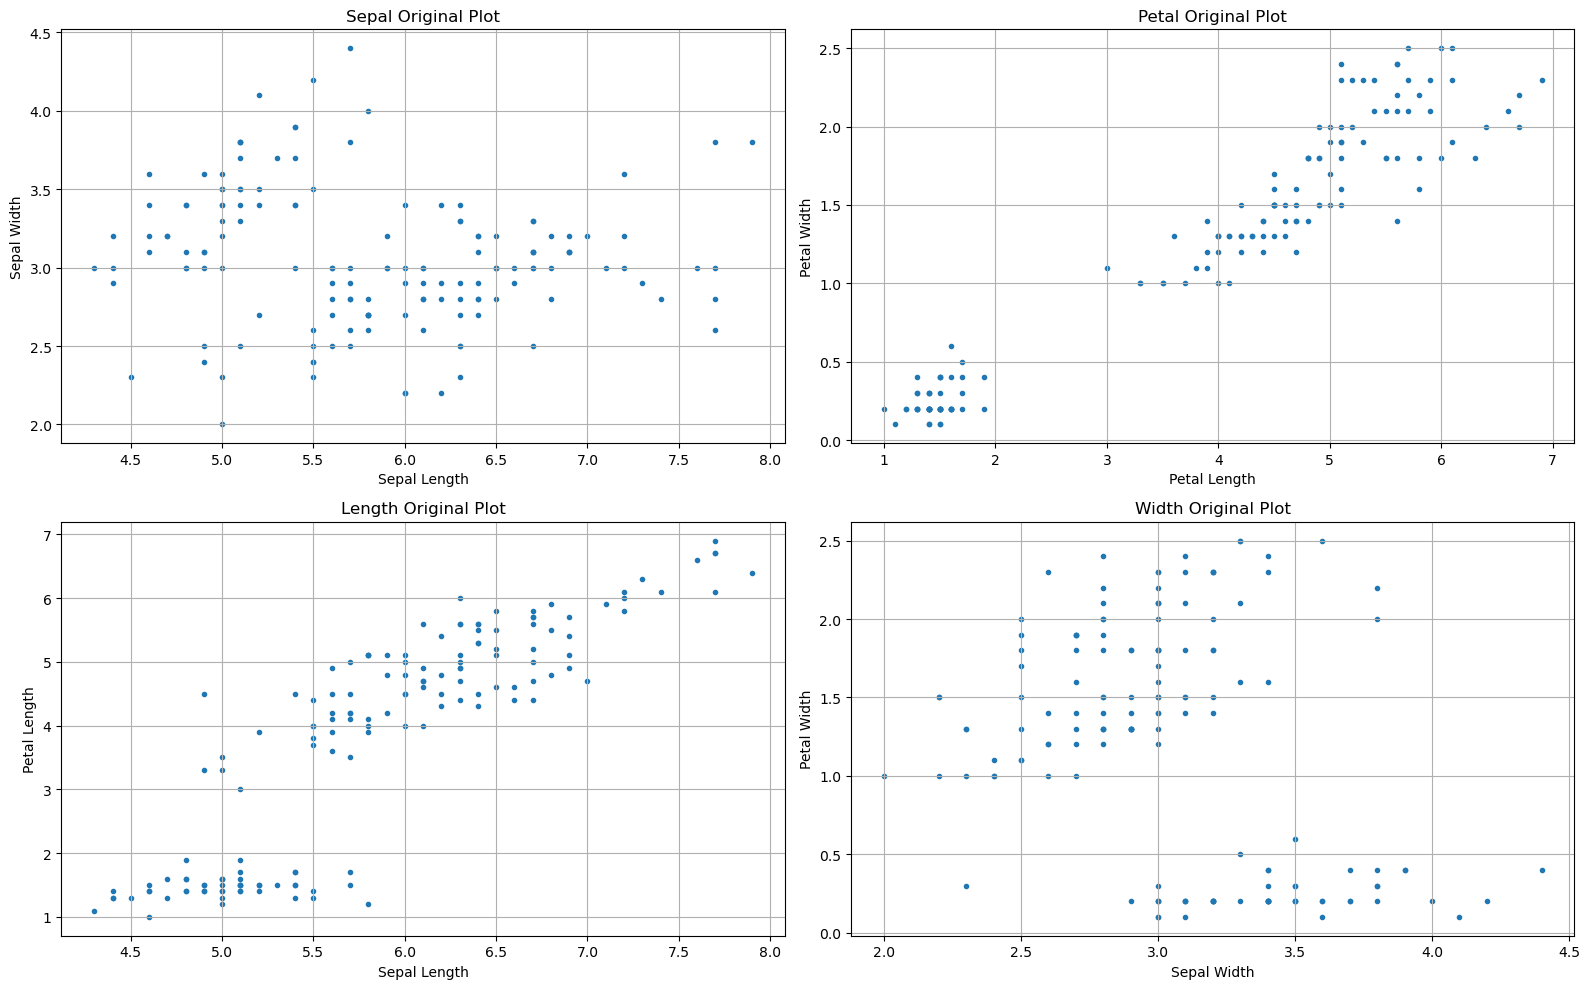

In [4]:
plt.figure(figsize=(16,10))
#scatter plot of sepal length vs sepal width 
plt.subplot(2,2,1)                                   
plt.scatter(list(Y.iloc[:,0]), list(Y.iloc[:,1]), marker='.')                                                                        
plt.xlabel('Sepal Length')                                                 
plt.ylabel('Sepal Width')                                         
plt.title('Sepal Original Plot')
plt.grid()                                                                                           
plt.tight_layout()

#scatter plot of petal length vs petal width
plt.subplot(2,2,2)                                   
plt.scatter(list(Y.iloc[:,2]), list(Y.iloc[:,3]), marker='.')                                                                        
plt.xlabel('Petal Length')                                                 
plt.ylabel('Petal Width')                                                 
plt.title('Petal Original Plot')                                           
plt.grid()                                                                 
plt.tight_layout()


#scatter plot of petal length vs sepal length
plt.subplot(2,2,3)                                   
plt.scatter(list(Y.iloc[:,0]), list(Y.iloc[:,2]), marker='.')                                                                       
plt.xlabel('Sepal Length')                                                 
plt.ylabel('Petal Length')                                                 
plt.title('Length Original Plot')                                           
plt.grid()                                                                 
plt.tight_layout()

#scatter plot of petal width vs sepal width
plt.subplot(2,2,4)                                   
plt.scatter(list(Y.iloc[:,1]), list(Y.iloc[:,3]), marker='.')                                                                       
plt.xlabel('Sepal Width')                                                 
plt.ylabel('Petal Width')                                                 
plt.title('Width Original Plot')                                            
plt.grid()                                                                 
plt.tight_layout()

### Plotting our Predictions

In [5]:
def jitter(x):
    return x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)

def plot_axis_pairs(X, axis_pairs, clusters, classes):
    n_rows = len(axis_pairs) // 2
    n_cols = 2
    plt.figure(figsize=(16, 10))
    # iterates through all the plots
    for index, (x_axis, y_axis) in enumerate(axis_pairs):
        plt.subplot(n_rows, n_cols, index+1)
        plt.title('Final Cluster',fontsize=26)
        plt.xlabel(iris.feature_names[x_axis])
        plt.ylabel(iris.feature_names[y_axis])
        plt.scatter(jitter(X[:, x_axis]), jitter(X[:, y_axis]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
        plt.grid()
        plt.tight_layout()


The accuracy of the permuted prediction against target before iteration  1:  0.6266666666666667



The accuracy of the permuted prediction against target before iteration  2:  0.68



The accuracy of the permuted prediction against target before iteration  3:  0.7866666666666666



The accuracy of the permuted prediction against target before iteration  4:  0.8533333333333334



The accuracy of the permuted prediction against target before iteration  5:  0.86




/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor relea


The accuracy of the permuted prediction against target before iteration  6:  0.8733333333333333



The accuracy of the permuted prediction against target before iteration  7:  0.8866666666666667



The accuracy of the permuted prediction against target before iteration  8:  0.9



The accuracy of the permuted prediction against target before iteration  9:  0.9466666666666667




/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor relea


The accuracy of the permuted prediction against target before iteration  10:  0.9733333333333334



The accuracy of the permuted prediction against target before iteration  11:  0.96



The accuracy of the permuted prediction against target before iteration  12:  0.9533333333333334




/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor relea


The accuracy of the permuted prediction against target before iteration  13:  0.9666666666666667



The accuracy of the permuted prediction against target before iteration  14:  0.9666666666666667




/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/1349575316.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')


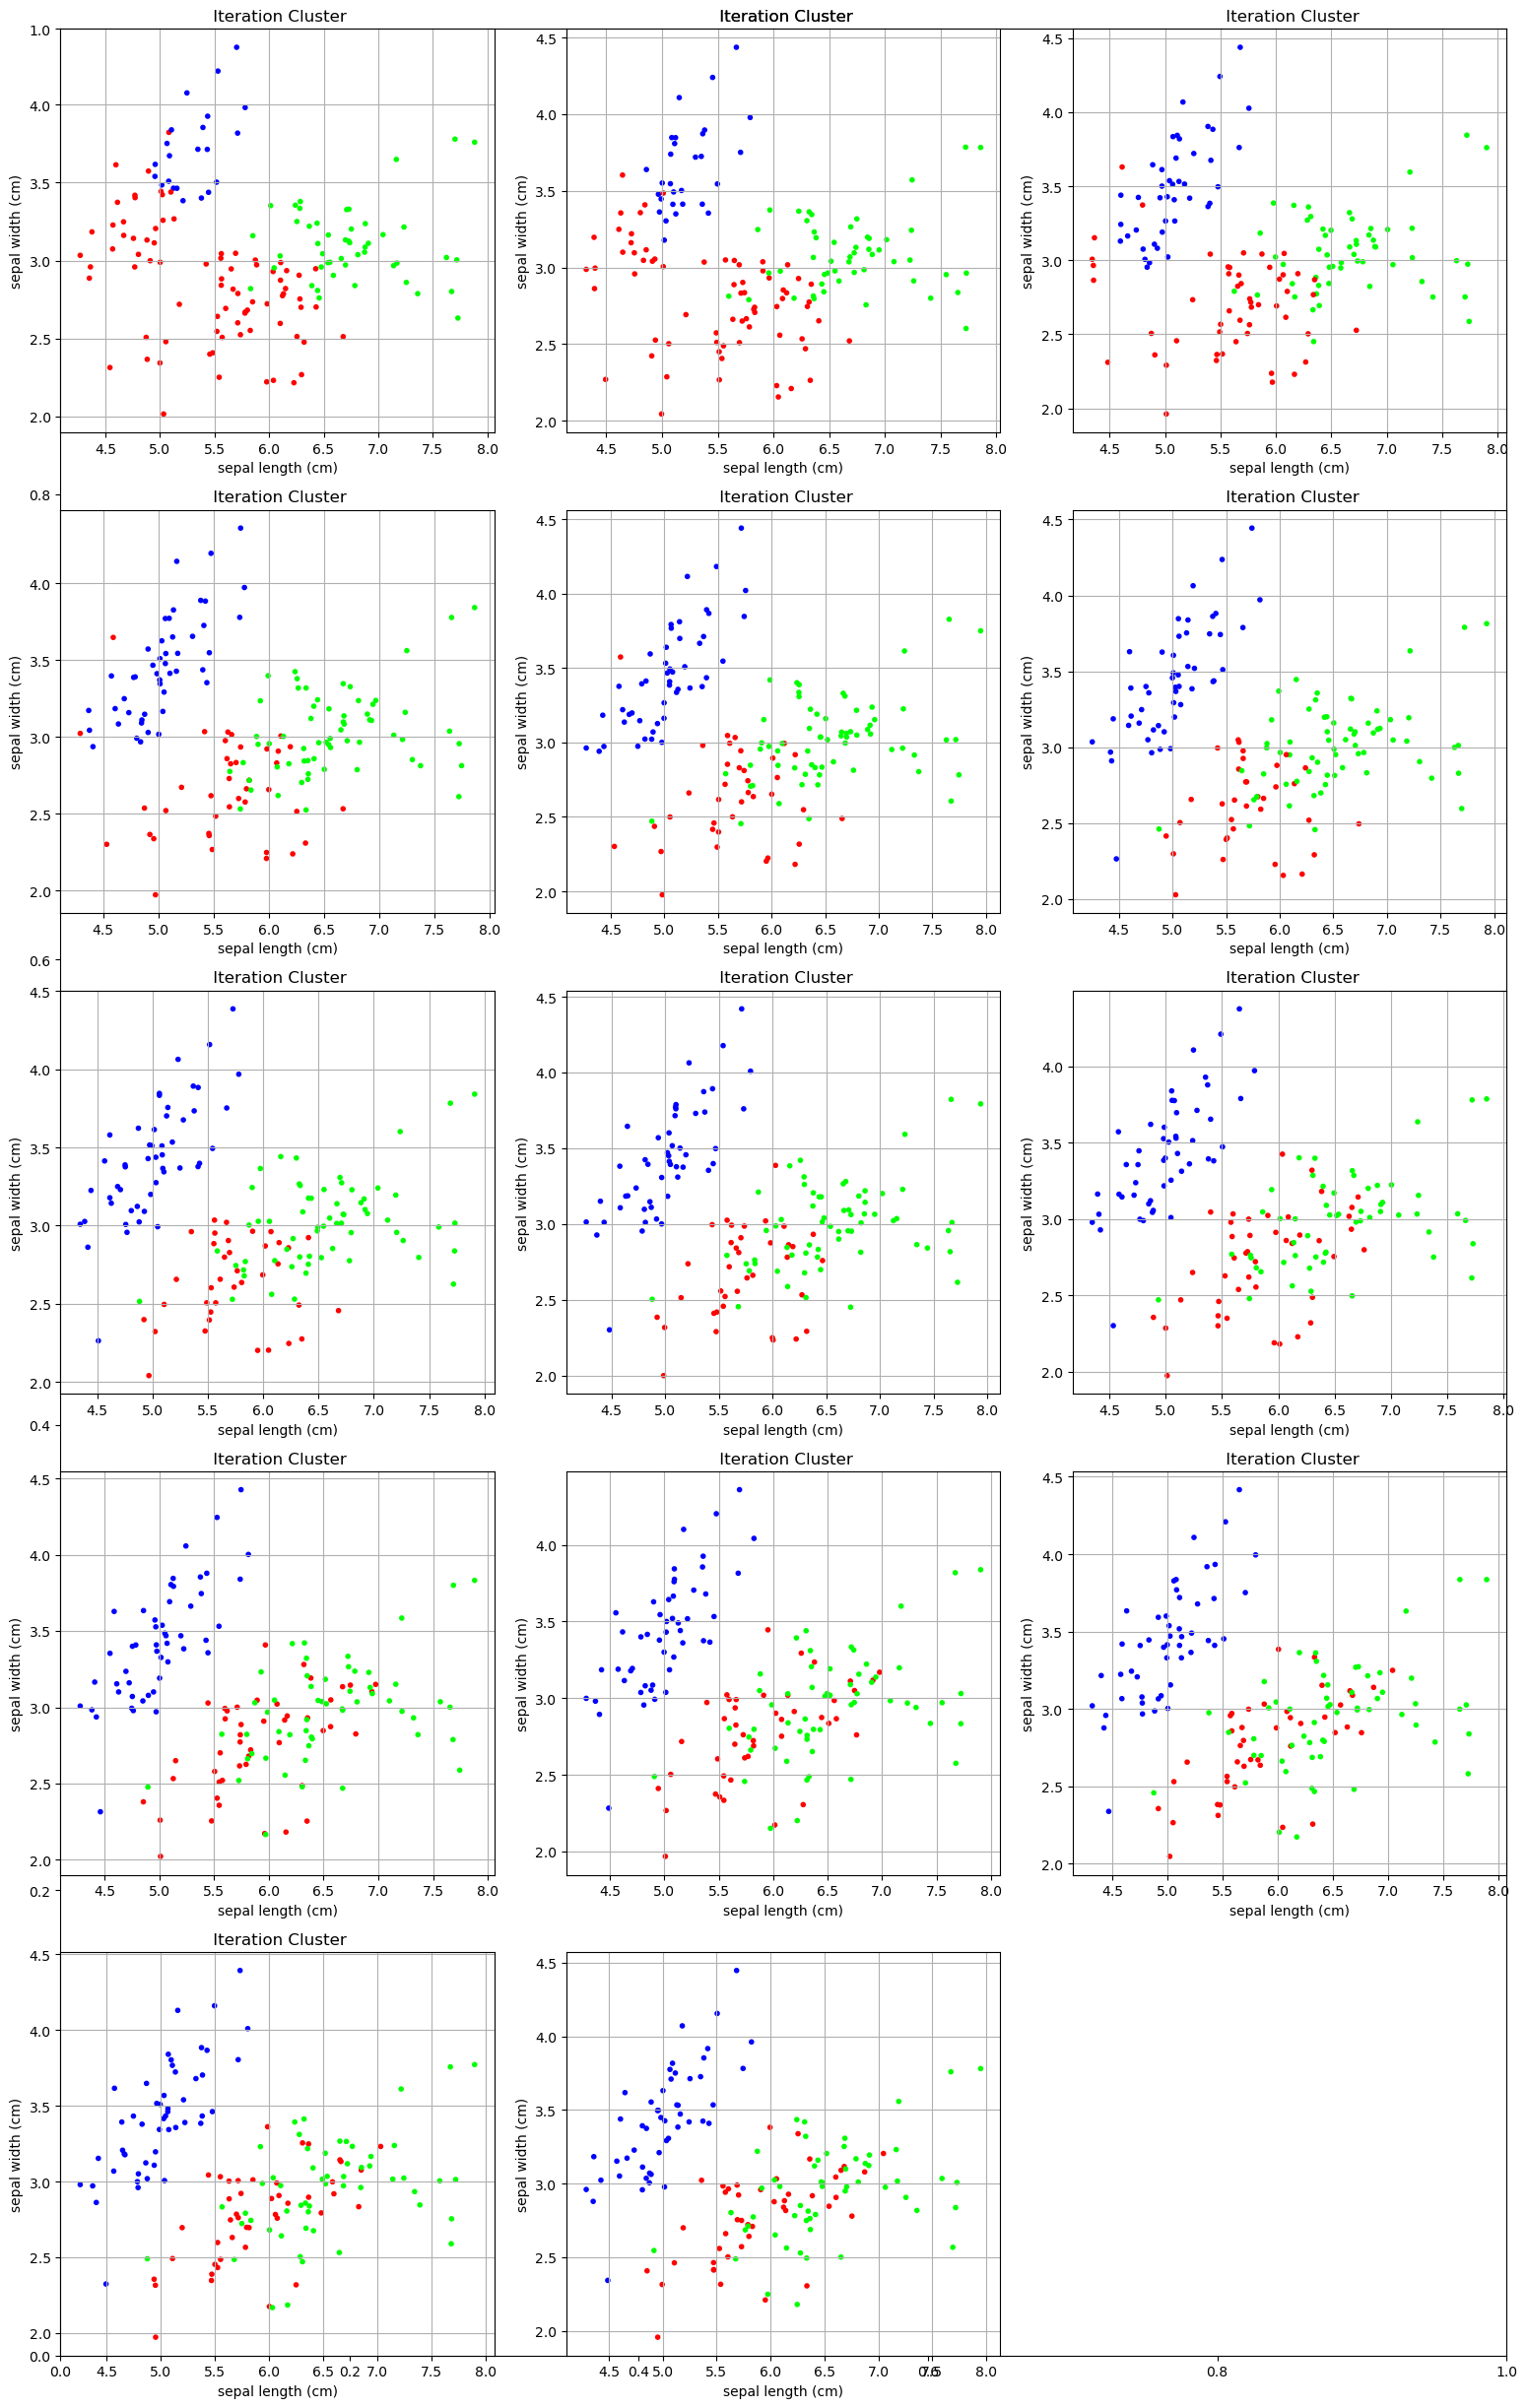

In [6]:
np.random.seed(42)
gmm = GMM(k=3, max_iter=14)
gmm.fit(X)

/var/folders/1p/s7kcr_dj2551zmjt7rdphlh80000gn/T/ipykernel_2091/2740945017.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, x_axis]), jitter(X[:, y_axis]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')


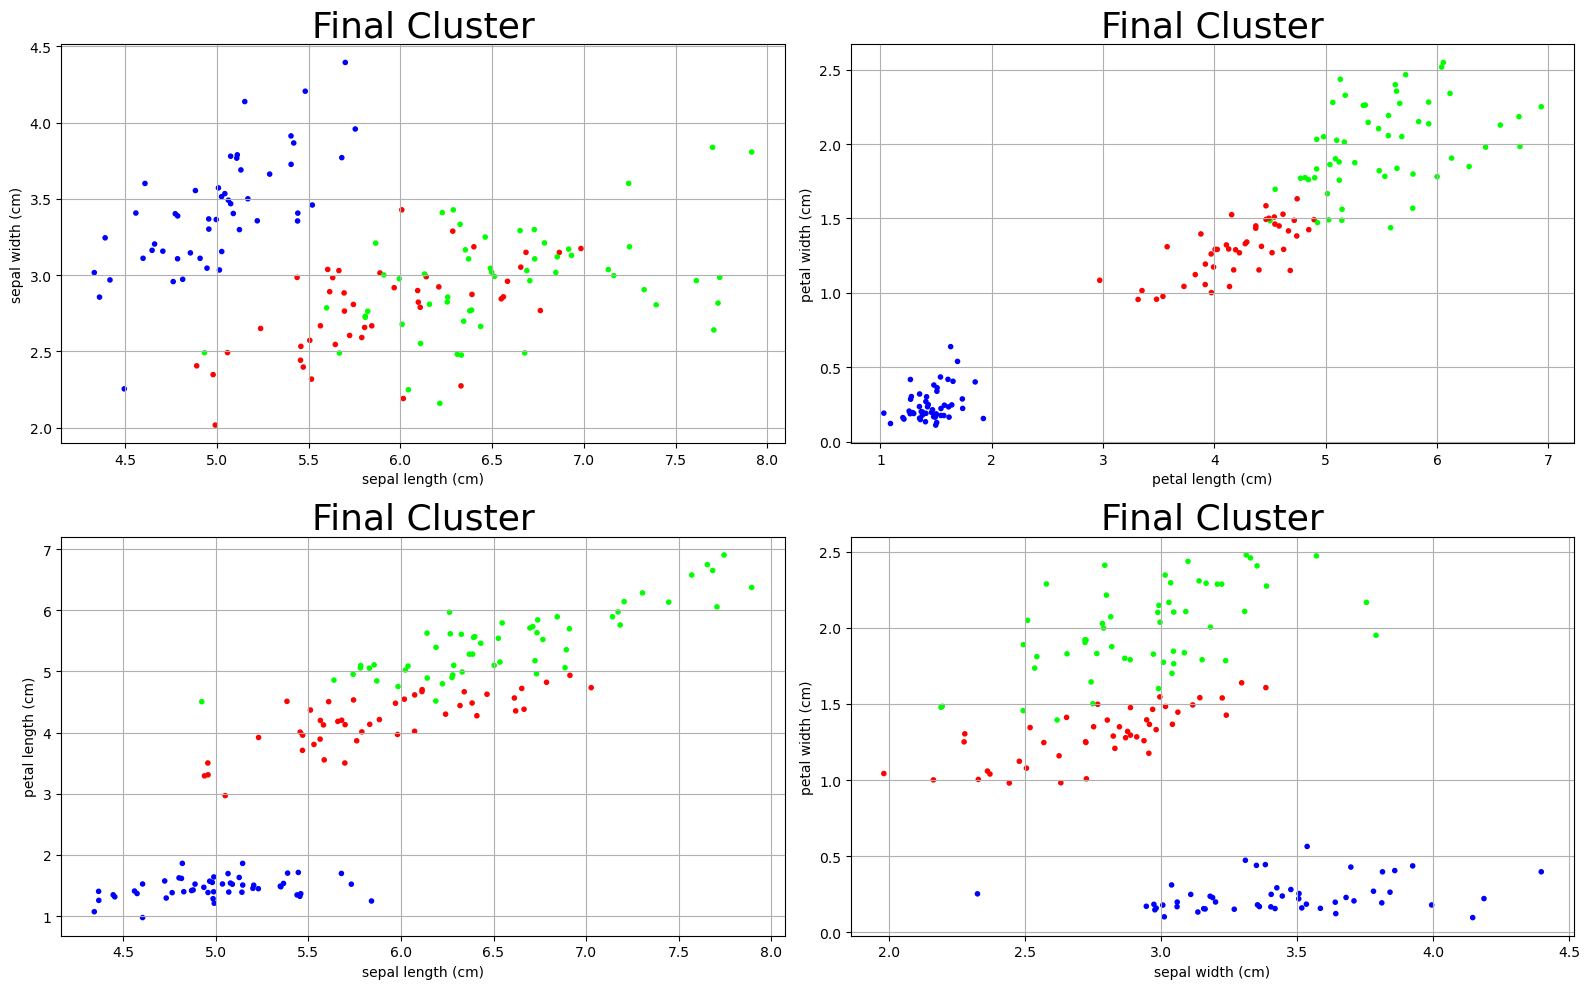

In [8]:
permuted_prediction = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])[gmm.predict(X)]
plot_axis_pairs(X=X, axis_pairs=[(0, 1), (2, 3), (0, 2), (1, 3)], clusters=permuted_prediction, classes=iris.target)
